# TEXT CLASSIFICATION FROM E-COMMERCE DATA - Project by MD Rashadul Islam

Importing Necessary Library and Reading Data

In [1]:
import pandas as pd
#commonly used for data manipulation and analysis
import numpy as np
#for numerical computing
import matplotlib.pyplot as plt
#for creating static, animated, and interactive visualizations.
import seaborn as sns
#based on Matplotlib, for creating informative and attractive statistical graphics.
import re
#used for regular expressions. It allows you to work with patterns in text data.
import string
#provides a collection of string constants and functions for string manipulation.
import nltk
#Natural Language Toolkit (NLTK), which is a library for working with human language data. NLTK provides tools for tokenization, stemming, lemmatization, and more.
from nltk.corpus import stopwords
#Stopwords are common words (e.g., "the," "and," "is") that are often removed from text data during NLP preprocessing.
from nltk.tokenize import word_tokenize
#used to tokenize (split) text into words or tokens.
from nltk.stem import WordNetLemmatizer
#Lemmatization is a text normalization technique that reduces words to their base or root form.
from nltk.corpus import wordnet
#WordNet is a lexical database that is often used in natural language processing for word-related tasks.
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
#Naive Bayes classifiers are commonly used for text classification tasks in NLP.
from nltk.stem import PorterStemmer
#Stemming is another text normalization technique that reduces words to their root form, although it may not always result in valid words.
from sklearn.feature_extraction.text import TfidfVectorizer
#TF-IDF (Term Frequency-Inverse Document Frequency) vectorization is a technique used to convert text data into numerical features for machine learning models.
from sklearn.model_selection import train_test_split
#used to split data into training and testing sets for model evaluation.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#accuracy_score: Computes the accuracy of a classification model.
#classification_report: Generates a detailed classification report with various metrics like precision, recall, and F1-score
#confusion_matrix: Calculates a confusion matrix to evaluate the performance of a classifier.
from sklearn.linear_model import LogisticRegression
#Logistic regression is a common classification algorithm.
from sklearn.svm import SVC
#SVC is a powerful classification algorithm.
from sklearn.neighbors import KNeighborsClassifier
#K-nearest neighbors is a classification algorithm based on similarity to neighboring data points.
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
#Ensemble methods combine multiple models to improve predictive accuracy.
from sklearn.preprocessing import LabelEncoder, StandardScaler
#LabelEncoder helps with encoding categorical labels, while StandardScaler helps with standardizing numerical features, ensuring that your data is in a suitable format for various machine learning algorithms.
from sklearn.tree import DecisionTreeClassifier
#Decision trees are used for both classification and regression tasks.
import xgboost as XGBClassifier
#XGBoost is commonly used for classification and regression tasks
from keras.models import Sequential
from keras.layers import Dense
#Sequential is used to create a linear stack of neural network layers, and Dense represents fully connected layers.

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/ecommerceDataset.csv')

In [3]:
df.columns = ['Class', 'Details']
df.head()

,Class,Details
0,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
1,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
2,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
3,Household,Incredible Gifts India Wooden Happy Birthday U...
4,Household,Pitaara Box Romantic Venice Canvas Painting 6m...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50424 entries, 0 to 50423
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    50424 non-null  object
 1   Details  50423 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


**Preprocessing**

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
# storeing stopwords in stopword to romove them from Details
stopword = set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [8]:
def preprocess_text(text):
    if isinstance(text,str):
        # Tokenize the text into word
        words = nltk.word_tokenize(text.lower()) #make all the text into lower case

        # Remove punctuations
        words = [word for word in words if word not in string.punctuation]

        # Remove stopword
        filtered_words = [word for word in words if word not in stopword]

        # Join the words into a text
        sentence = ' '.join(filtered_words)

        return sentence
    else:
        return ''

In [9]:
df['Details'] = df['Details'].apply(preprocess_text)

In [10]:
df.Details

0        saf 'floral framed painting wood 30 inch x 10 ...
1        saf 'uv textured modern art print framed paint...
2        saf flower print framed painting synthetic 13....
3        incredible gifts india wooden happy birthday u...
4        pitaara box romantic venice canvas painting 6m...
                               ...                        
50419    strontium microsd class 10 8gb memory card bla...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w4 white karbonn titaniu...
50422    samsung guru fm plus sm-b110e/d black colour b...
50423                       micromax canvas win w121 white
Name: Details, Length: 50424, dtype: object

**Lemmatization**

In [11]:
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default to NOUN if the POS tag is not recognized

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag)) for word, pos_tag in pos_tags]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [13]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
df['Details'] = df['Details'].apply(lemmatize_text)

In [15]:
df.Details

0        saf 'floral frame paint wood 30 inch x 10 inch...
1        saf 'uv textured modern art print frame paint ...
2        saf flower print frame paint synthetic 13.5 in...
3        incredible gift india wooden happy birthday un...
4        pitaara box romantic venice canvas paint 6mm t...
                               ...                        
50419    strontium microsd class 10 8gb memory card bla...
50420    crossbeats wave waterproof bluetooth wireless ...
50421    karbonn titanium wind w4 white karbonn titaniu...
50422    samsung guru fm plus sm-b110e/d black colour b...
50423                       micromax canvas win w121 white
Name: Details, Length: 50424, dtype: object

**TF-IDF vectorizer**

In [16]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Convert text to TF-IDF features
X = tfidf_vectorizer.fit_transform(df['Details'])
y = df['Class']

**Fit Model and Classification Result**

In [17]:
#Encode label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Class'])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Initialize StandardScaler with with_mean=False for sparse matrices
scaler = StandardScaler(with_mean=False)

# Scale the TF-IDF matrix
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Initialize classifiers
classifiers = {
    "multinomial" : MultinomialNB(),
    "Bernoulli" : BernoulliNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "K Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

# Accuracy Results
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Display results
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")
    print(f"{name} Classification Report:")
    predictions = classifiers[name].predict(X_test)
    print(classification_report(y_test, predictions, target_names=label_encoder.classes_, zero_division=1))
    print("=" * 50)

multinomial: Accuracy = 0.9116
multinomial Classification Report:
                        precision    recall  f1-score   support

                 Books       0.96      0.85      0.90      2379
Clothing & Accessories       0.94      0.95      0.94      1750
           Electronics       0.93      0.89      0.91      2082
             Household       0.88      0.95      0.91      3874

              accuracy                           0.91     10085
             macro avg       0.93      0.91      0.92     10085
          weighted avg       0.92      0.91      0.91     10085

Bernoulli: Accuracy = 0.8630
Bernoulli Classification Report:
                        precision    recall  f1-score   support

                 Books       0.92      0.85      0.88      2379
Clothing & Accessories       0.70      0.95      0.81      1750
           Electronics       0.92      0.81      0.86      2082
             Household       0.91      0.86      0.88      3874

              accuracy             

**ANN Accuracy Test**

In [33]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

X_train = X_train.toarray()

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict using the trained model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"ANN Accuracy: {accuracy:.4f}")

# Generate classification report
print("ANN Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))


Epoch 1/10
1261/1261 [==============================] - 11s 7ms/step - loss: 0.2852 - accuracy: 0.9177
Epoch 2/10
1261/1261 [==============================] - 3s 3ms/step - loss: 0.1622 - accuracy: 0.9546
Epoch 3/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.1346 - accuracy: 0.9618
Epoch 4/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.1095 - accuracy: 0.9692
Epoch 5/10
1261/1261 [==============================] - 3s 2ms/step - loss: 0.0856 - accuracy: 0.9768
Epoch 6/10
1261/1261 [==============================] - 3s 2ms/step - loss: 0.0650 - accuracy: 0.9822
Epoch 7/10
1261/1261 [==============================] - 4s 3ms/step - loss: 0.0477 - accuracy: 0.9874
Epoch 8/10
1261/1261 [==============================] - 3s 3ms/step - loss: 0.0352 - accuracy: 0.9906
Epoch 9/10
1261/1261 [==============================] - 3s 3ms/step - loss: 0.0271 - accuracy: 0.9928
Epoch 10/10
316/316 [==============================] - 1s 2ms/step
ANN Accuracy: 

*  Precision measures how many of the predicted positive instances were actually positive.
*  Recall measures how many of the actual positive instances were correctly predicted
*  The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. Higher F1-scores indicate better model performance.
*  The support represents the number of instances in each class in your dataset.
*  Accuracy is the ratio of correctly predicted instances to the total number of instances.
*  Macro-averaging calculates the metric independently for each class and then takes the average. It gives equal weight to each class.
*  Weighted averaging also calculates the metric for each class, but it gives more weight to classes with larger support.

**Confusion Matrix**

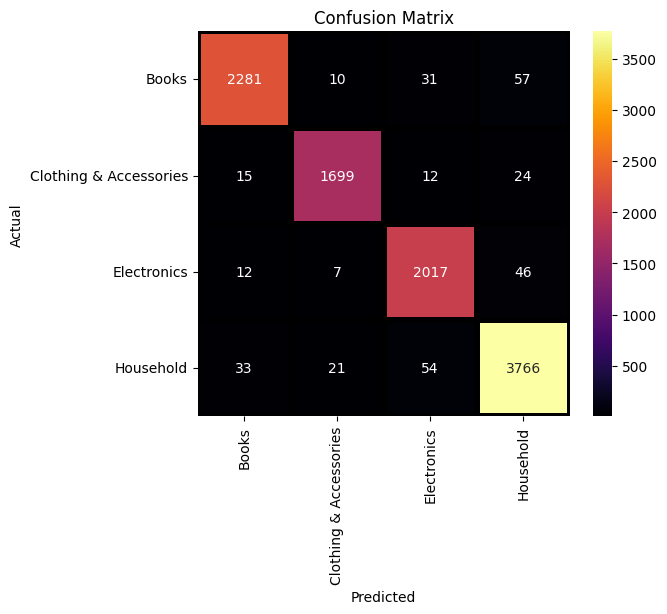

In [34]:
label_name=["Books","Clothing & Accessories","Electronics","Household"]
cf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cf,annot=True,fmt="d",cmap="inferno",xticklabels=label_name,yticklabels=label_name,lw=4,linecolor="black")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Comparison Between models**

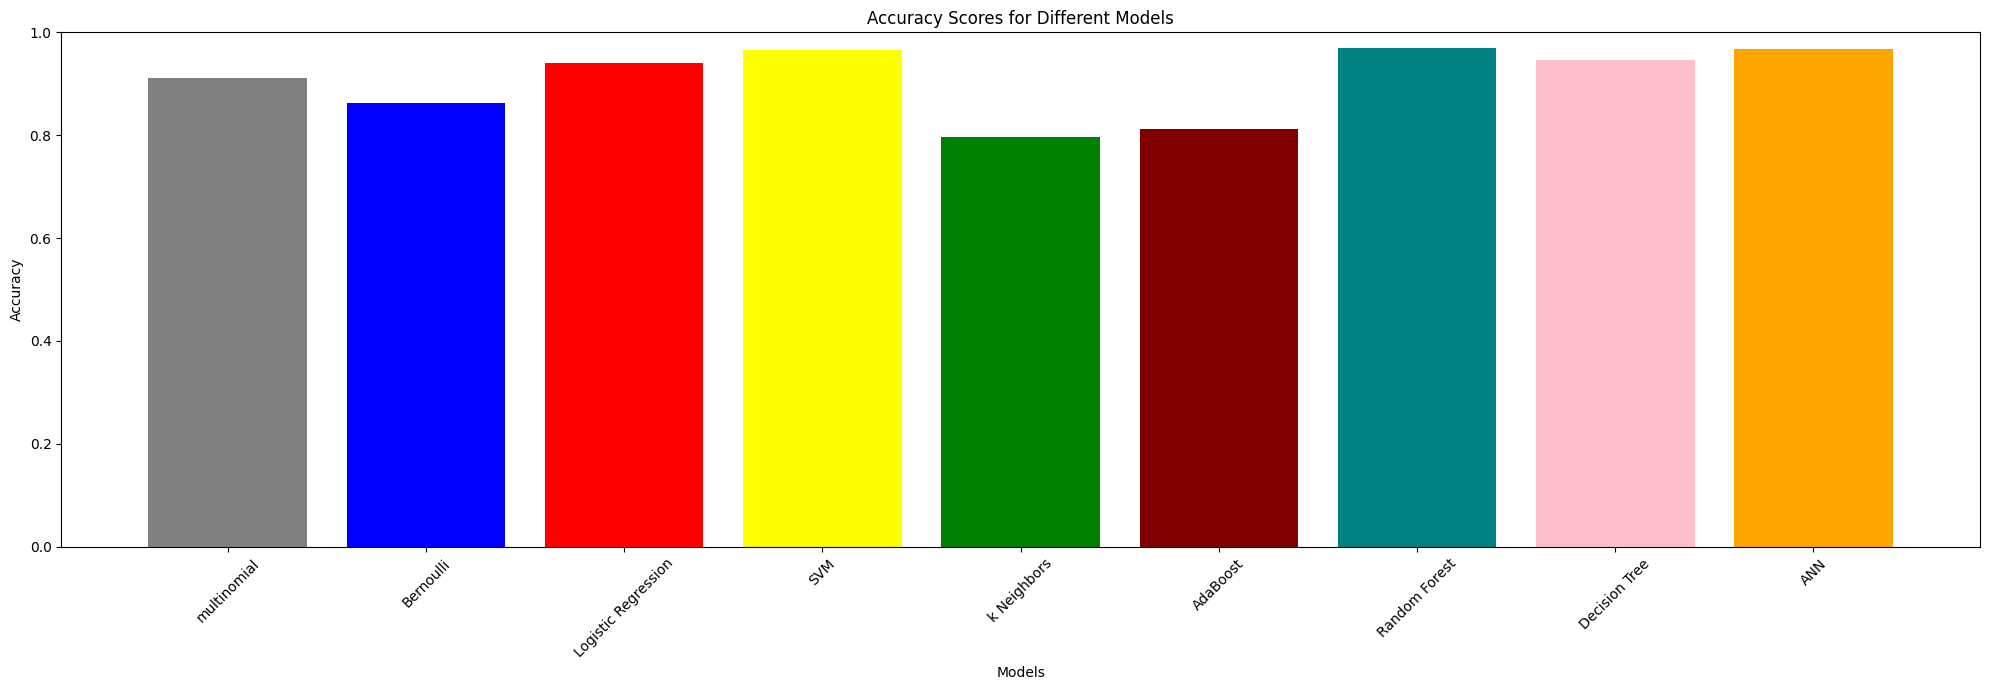

In [36]:
models = ['multinomial', "Bernoulli",'Logistic Regression', 'SVM', 'k Neighbors', 'AdaBoost', 'Random Forest', 'Decision Tree', 'ANN']
accuracy_scores = [0.9116, 0.8630, 0.9409, 0.9657, 0.7972, 0.8112, 0.9688, 0.9457, 0.9681]

plt.figure(figsize=(20, 7))
plt.bar(models, accuracy_scores, color=['grey', 'blue', 'red', 'yellow', 'green', 'maroon', 'teal', 'pink', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Data Visualisation**

In [37]:
label_encoder = LabelEncoder()
df['T_Class'] = label_encoder.fit_transform(df['Class'])

df['Category'] = label_encoder.inverse_transform(df['T_Class'])

df[['Class', 'T_Class', 'Category']].value_counts()

Class                   T_Class  Category              
Household               3        Household                 19312
Books                   0        Books                     11820
Electronics             2        Electronics               10621
Clothing & Accessories  1        Clothing & Accessories     8671
dtype: int64

In [38]:
df.drop(["Class","Category"],axis=1,inplace=True)

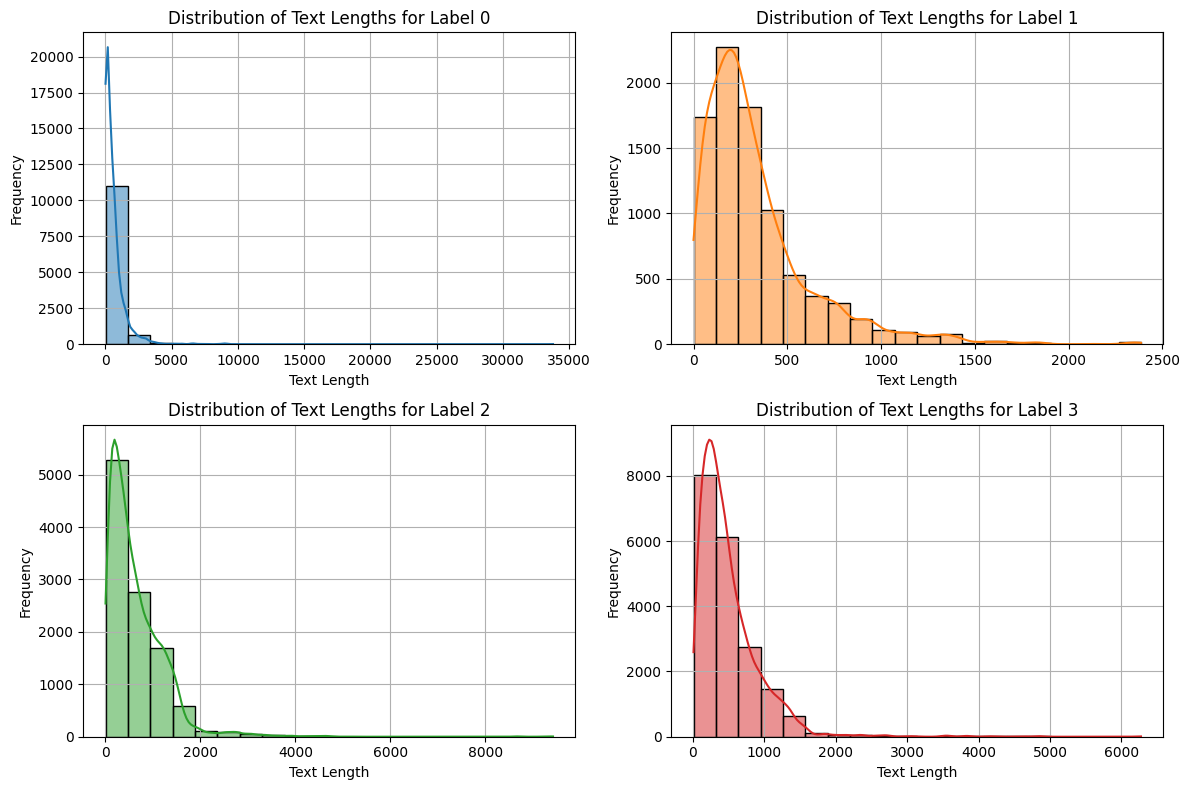

In [39]:
books_len=df[df["T_Class"]==0]["Details"].str.len()
clothing_len=df[df["T_Class"]==1]["Details"].str.len()
Electronic_len=df[df["T_Class"]==2]["Details"].str.len()
Household_len=df[df["T_Class"]==3]["Details"].str.len()


fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
for label, ax in zip(range(4), axes):
    text_lengths = df[df["T_Class"] == label]["Details"].str.len()
    sns.histplot(text_lengths, bins=20, color=sns.color_palette()[label], ax=ax, kde=True)

    ax.set_title(f'Distribution of Text Lengths for Label {label}')
    ax.set_xlabel('Text Length')
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()